<a href="https://colab.research.google.com/github/gammapasta/machineLearning/blob/main/4_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#데이터 준비
riris 데이터 세트 (다중분류)

In [25]:
import pandas as pd
iris = pd.read_csv('https://raw.githubusercontent.com/jmnote/zdata/master/R/iris.csv')


#클래스 추출
데이터에 어떤 클래스가 있는지 확인해보자

In [12]:
print(iris)
print(pd.unique(iris['Species']))

     Sepal.Length  Sepal.Width  Petal.Length  Petal.Width    Species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]
['setosa' 'versicolor' 'virginica']


#입력 데이터와 정답 데이터를 생성하자
입력 데이터는 iris_input  
정답 데이터는 iris_target  
5번쨰까지 데이터를 각각 출력

In [17]:
iris_input = iris[['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']].to_numpy()
iris_target = iris['Species'].to_numpy()

print(iris_input[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


#훈련 세트와 테스트 세트로 나누자
train_input, test_input, train_target, test_target  
</br>
train_input, train_target의 형태를 출력하자  

데이터 석어야함 stratify

In [23]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target   = train_test_split(iris_input, iris_target, random_state=42, stratify=iris_target)

print(train_input.shape, train_target.shape)

(112, 4) (112,)


#데이터 표준화


In [24]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

# k최근접 이웃 알고리즘을 이용하여 훈련하고 훈련 세트와 테스트 세트에 대해 평가

In [32]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)

print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.9642857142857143
0.9210526315789473


#테스트 세트의 5개의 데이터에 대해 예측과 확률을 알아보자

In [35]:
print(kn.predict(test_scaled[:5]))

['setosa' 'versicolor' 'versicolor' 'versicolor' 'setosa']


#최적화



In [44]:
i = 1
while i < 20:
  print("i= ", i)
  kn = KNeighborsClassifier(n_neighbors=i)
  kn.fit(train_scaled, train_target)
  print(kn.score(train_scaled, train_target))
  print(kn.score(test_scaled, test_target))
  i = i + 1



i=  1
1.0
0.9473684210526315
i=  2
0.9732142857142857
0.9210526315789473
i=  3
0.9642857142857143
0.9210526315789473
i=  4
0.9642857142857143
0.9210526315789473
i=  5
0.9821428571428571
0.9210526315789473
i=  6
0.9642857142857143
0.9210526315789473
i=  7
0.9732142857142857
0.9473684210526315
i=  8
0.9642857142857143
0.9210526315789473
i=  9
0.9642857142857143
0.9736842105263158
i=  10
0.9732142857142857
0.9736842105263158
i=  11
0.9553571428571429
0.9736842105263158
i=  12
0.9732142857142857
0.9736842105263158
i=  13
0.9642857142857143
0.9736842105263158
i=  14
0.9732142857142857
0.9473684210526315
i=  15
0.9732142857142857
0.9736842105263158
i=  16
0.9732142857142857
0.9736842105263158
i=  17
0.9732142857142857
0.9736842105263158
i=  18
0.9732142857142857
0.9736842105263158
i=  19
0.9732142857142857
0.9473684210526315


In [45]:
  #10일떄 가장 높음
  kn = KNeighborsClassifier(n_neighbors=10)
  kn.fit(train_scaled, train_target)
  print(kn.score(train_scaled, train_target))
  print(kn.score(test_scaled, test_target))

0.9732142857142857
0.9736842105263158


#로지스틱 회귀를 이용하여 다중 분류 훈련 및 최적화하기

In [55]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C = 20, max_iter=1000) #매개변수 넣기

#객체생성, 훈련
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

#5까지 예측
print(lr.predict(test_scaled[:5]))

import numpy as np
proba = lr.predict_proba(test_scaled[:5]) #예측한 확률을 숫자로 출력
print(np.round(proba, decimals=3))

print(lr.classes_)
print(lr.coef_.shape, lr.intercept_.shape) #클래스마다 계수와 절편을 만든다 5개의 특성을 사용하므로 열은 5개 타깃은 7개이므로 7개

decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

from scipy.special import softmax

proba = softmax(decision, axis=1) #가로로 row 를 사용해서 시험!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
print(np.round(proba, decimals=3))

0.9821428571428571
0.9473684210526315
['setosa' 'versicolor' 'versicolor' 'versicolor' 'setosa']
[[0.999 0.001 0.   ]
 [0.003 0.938 0.059]
 [0.004 0.994 0.001]
 [0.    0.995 0.004]
 [0.998 0.002 0.   ]]
['setosa' 'versicolor' 'virginica']
(3, 4) (3,)
[[ 14.49   7.22 -21.71]
 [ -2.88   2.82   0.06]
 [ -1.46   3.99  -2.52]
 [ -3.4    4.44  -1.04]
 [ 13.45   7.44 -20.9 ]]
[[0.999 0.001 0.   ]
 [0.003 0.938 0.059]
 [0.004 0.994 0.001]
 [0.    0.995 0.004]
 [0.998 0.002 0.   ]]


#확률적 경사 하강법을 이용하여 다중 분류 훈련 밑 최적화 하기

0.8035714285714286
0.7894736842105263
[[ -1.7869281    2.95630265  -3.40604012  -3.24188287]
 [ -4.99018037  -4.40722501   9.69137377  -7.79752907]
 [ -0.84386405 -11.2561908   27.79121832  31.79025786]] [ -4.59859683 -11.36007382 -31.47659983]


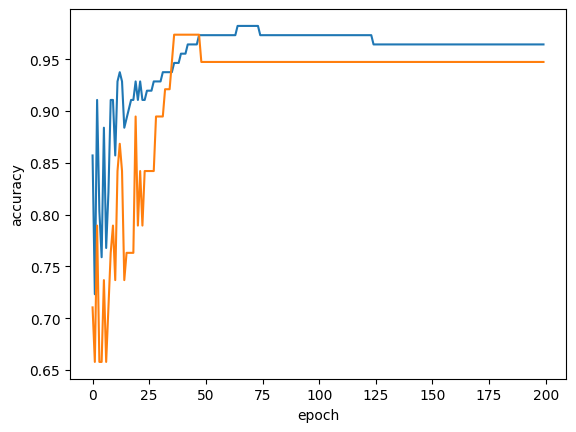

In [87]:
from sklearn.linear_model import SGDClassifier
#객체 생성
sc = SGDClassifier(loss='log_loss', max_iter=100, random_state=42) #100에포크씩 훈련

#훈련
sc.fit(train_scaled, train_target)

#평가
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))
print(sc.coef_, sc.intercept_) #모델 파라미터 fit쓰면 지우고 다시 하지만 partialfit은 아님

sc = SGDClassifier(loss='log_loss', random_state=42)

train_score = []
test_score = []

classes = np.unique(train_target)




for _ in range(0, 200):
    sc.partial_fit(train_scaled, train_target, classes=classes)

    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))





import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()
#갭이 가장 작은거 선

#와인 퀄리티 데이터

In [58]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [60]:
wine = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/winequality-red.csv', sep=';')
wine.head()

#타겟 데이터 없음

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [86]:
print(pd.unique(wine['quality']))

#빈값 있는지
print(wine.isnull().any())

[5 6 7 4 8 3]
fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool


In [74]:
wine_input = wine[['fixed acidity','volatile acidity', 'citric acid', 'residual sugar',	'chlorides',	'free sulfur dioxide',	'total sulfur dioxide',	'density',	'pH',	'sulphates',	'alcohol']].to_numpy()
wine_target = wine['quality'].to_numpy()

print(wine_input[:5])

[[7.400e+00 7.000e-01 0.000e+00 1.900e+00 7.600e-02 1.100e+01 3.400e+01
  9.978e-01 3.510e+00 5.600e-01 9.400e+00]
 [7.800e+00 8.800e-01 0.000e+00 2.600e+00 9.800e-02 2.500e+01 6.700e+01
  9.968e-01 3.200e+00 6.800e-01 9.800e+00]
 [7.800e+00 7.600e-01 4.000e-02 2.300e+00 9.200e-02 1.500e+01 5.400e+01
  9.970e-01 3.260e+00 6.500e-01 9.800e+00]
 [1.120e+01 2.800e-01 5.600e-01 1.900e+00 7.500e-02 1.700e+01 6.000e+01
  9.980e-01 3.160e+00 5.800e-01 9.800e+00]
 [7.400e+00 7.000e-01 0.000e+00 1.900e+00 7.600e-02 1.100e+01 3.400e+01
  9.978e-01 3.510e+00 5.600e-01 9.400e+00]]


In [82]:
#from sklearn.model_selection import train_test_split

train_input1, test_input1, train_target1, test_target1 = train_test_split(wine_input, wine_target,random_state=42, stratify=wine_target )

print(train_input1.shape, train_target1.shape)

(1199, 11) (1199,)


In [83]:
from sklearn.preprocessing import SingleScalar

ImportError: ignored